In [ ]:
import ____ as np
import ____ as pd
import ____ as sns
import ____ as plt
import ____    # Load the library used for saving objects
from IPython.display import ____

In [ ]:
pokemon_df = pd.read_csv(____)
combats_df = pd.read_csv(____)

# **Basic Data Exploration**

In [ ]:
# Find shape of your data
print(pokemon_df.____)
print(combats_df.____)

In [ ]:
# Print the dataframe schema and dtypes
pokemon_df.____()

In [ ]:
# Print the dataframe schema and dtypes
combats_df.____()

In [ ]:
# Print summary statistics
pokemon_df.____()

# Change column names

In [ ]:
# You can use either function or dict to rename
pokemon_df.rename(lambda x: x.replace(" ", "").lower(), axis = 1, inplace = True)
print(pokemon_df.columns)

In [ ]:
cols_to_rename = {
    "#": "id",
    "sp.atk": "sattack",
    "sp.def": "sdefense"
}

# Rename the columns #, sp.atk, sp.def
pokemon_df.____(____, ____ = True, axis = ____)
print(pokemon_df.columns)

In [ ]:
combats_df.rename({
    "First_pokemon": "pokemon1",
    "Second_pokemon": "pokemon2",
    "Winner": "winner"
}, ____ = 1, ____ = True)
print(combats_df.columns)

In [ ]:
# Display top 5 rows
display(pokemon_df.____())
display(combats_df.____())

In [ ]:
# Display bottom 5 rows
display(pokemon_df.____())
display(combats_df.____())

In [ ]:
# Randomly display rows
display(pokemon_df.____())
display(combats_df.____())

# Finding missing values 

In [ ]:
pokemon_null_arr = pokemon_df.isna()    # Returns boolean df

# Get the boolean array containing 
# True where null values are found
combats_null_arr = combats_df.____() 

display(pokemon_null_arr.head())
display(combats_null_arr.____())

In [ ]:
print("Missing values in pokemon_df\n")
print(pokemon_null_arr.sum())
print("-" * 25)
print("Missing values in combats_df\n")
print(combats_null_arr.____())

# `.duplicated()` and `.nunique()` - Finding duplicates

In [ ]:
pokemon_dup_arr = pokemon_df.duplicated()    # Returns boolean df
combats_dup_arr = combats_df.____() 

display(pokemon_dup_arr.____())
display(combats_dup_arr.head())

In [ ]:
print(pokemon_dup_arr.sum())
print(combats_dup_arr.____())

In [ ]:
print(pokemon_df.nunique())

In [ ]:
# Print unique items in each column of combats_df
print(combats_df.____())

# `.value_counts()` - Explore individual columns

In [ ]:
print(pokemon_df["generation"].value_counts())

In [ ]:
# Find the count of each value in type1 column
print(pokemon_df["type1"].____())

# **Data Cleaning**

In [ ]:
# type2 column in pokemon_df contains null values
# But that is expected one and not an inconsistency
# So we wont delete those rows

combats_df.dropna(inplace = True)

In [ ]:
# combats_df contains duplicate rows
# But they are not removed since one pokemon
# can battle another any number of times
# and results may be same

pokemon_df.drop_duplicates(inplace = True)

In [ ]:
print(pokemon_df.shape)
print(combats_df.____)

# TypeCasting

In [ ]:
# Convert the following columns to str datatype
pokemon_df[["name", "type1", "type2"]] = pokemon_df[["name", "type1", "type2"]].astype(____)

# applying a function to every row or every column

In [ ]:
def strip_lower(string):
    if string != "nan":
        return string.strip().lower()
    else:
        return np.nan

In [ ]:
# Apply the above function on the following
pokemon_df["name"] = pokemon_df["name"].____(____)
pokemon_df["type1"] = pokemon_df["type1"].____(____)
pokemon_df["type2"] = pokemon_df["type2"].____(____)

pokemon_df.head()

# Joining DataFrames

In [ ]:
merge_df = combats_df.merge(pokemon_df, left_on = "pokemon1", right_on = "id")
merge_df.head()

In [ ]:
merge_df = merge_df.merge(
    pokemon_df,
    left_on = ____,
    right_on = ____, 
    suffixes = ("_pok1", "_pok2")
)

merge_df.head()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
display(merge_df.head())
print(merge_df.info())

# `.loc[row, col]` - Access values in the DataFrame

In [ ]:
# Process winner column into binary target
# 0 - pokemon1; 1 - pokemon2

for i in range(merge_df.shape[0]):
    
    winner = merge_df.loc[i, "winner"]
    pok1 = merge_df.loc[i, "pokemon1"]
    
    if winner == pok1:
        merge_df.loc[i, "winner"] = 0
    else:
        merge_df.loc[i, "winner"] = 1

merge_df.head()

In [ ]:
merge_df.drop(["pokemon1", "pokemon2"], inplace = True, axis = 1)

# Get the column names
col_names = list(merge_df.____)
merge_df = merge_df[col_names[1:] + [col_names[0]]]
merge_df.info()

# **Exploratory Data Analysis**
**( i ) Understand the data**


**First, Let's check the range of values in numeric columns**

In [ ]:
# Complete the function such that it prints minimum
# and maximum values

def print_range(column):
    print("Column: ", column.name)
    print("Min: ", column.____(), " Max: ", column.____())

numeric_cols = ["hp", "attack", "defense", "sattack", "sdefense", "speed"]

for col in numeric_cols:
    print_range(pokemon_df[col])

**Now, Let's check the unique categories available in type column**

In [ ]:
# Get the unique classes in type1 column
unique_types = list(pokemon_df["type1"].____())

unique_types.extend(pokemon_df["type2"].unique())
unique_types = list(set(unique_types) - set([np.nan]))
print(unique_types)

# Checking correlation between features
**Correlation - movement of two variables in coordination with one another.**

In [ ]:
pokemon_df[numeric_cols].corr()

In [ ]:
# Use correlation values and create heatmap 
sns.heatmap(pokemon_df[numeric_cols].____(), cmap = "YlGnBu", annot = True)
plt.show()

# Visualizing the plot of 
**( i ) `attack` vs `defence`**<br>
**( ii ) `sattack` vs `sdefence`**<br>
**Scatterplots can be used to visualize relationship between two continuos variables.**

In [ ]:
sns.scatterplot(
    x = pokemon_df["attack"],
    y = pokemon_df["defense"],
)

plt.show()

In [ ]:
# Create scatter plot of sattack vs sdefense
sns.____(
    x = pokemon_df[____],
    y = pokemon_df[____],
)

plt.____()

# Visualizing frequency distribution of
**( i ) Pokemon Type (Categorical Variable)**<br>

In [ ]:
# Frequency distribution of Pokemon type in pokemon_df
types = list(pokemon_df["type1"])
types.extend(list(pokemon_df["type2"]))
types.remove(np.nan)

plt.figure(figsize = (14, 6))
sns.countplot(x = types)
plt.show()

In [ ]:
# Frequency distribution of Pokemon type in combats_df
types = list(merge_df["type1_pok1"])
types.extend(list(merge_df["type2_pok1"]))
types.extend(list(merge_df["type1_pok2"]))
types.extend(list(merge_df["type2_pok2"]))
types.remove(np.nan)

plt.figure(figsize = (14, 6))
sns.____(x = types)
plt.show()

**( ii ) HP, attack, defense, sattack, sdefense, speed (Continuous Variables)**

In [ ]:
# Creating subplots
fig, ax = plt.subplots(3, 2, figsize = (11, 17))
sns.set_style("darkgrid")

# Frequency distribution of HP
sns.histplot(
    pokemon_df["hp"],
    ax = ax[0, 0],
    color = "red"
)

# Frequency distribution of speed
sns.____(
    pokemon_df["speed"],
    ax = ax[0, 1],
    color = "orange"
)

# Frequency distribution of attack
sns.____(
    pokemon_df[____],
    ax = ax[1, 0],
    color = "green"
)
# Frequency distribution of defense with color blue
sns.histplot(
    pokemon_df[____],
    ax = ax[1, 1],
    color = ____
)
# Frequency distribution of sattack
sns.histplot(
    pokemon_df["sattack"],
    ax = ax[2, 0],
    color = "purple"
)
# Frequency distribution of sdefense
sns.histplot(
    pokemon_df["sdefense"],
    ax = ax[2, 1],
    color = "gold"
)


plt.show()

# Check for outliers
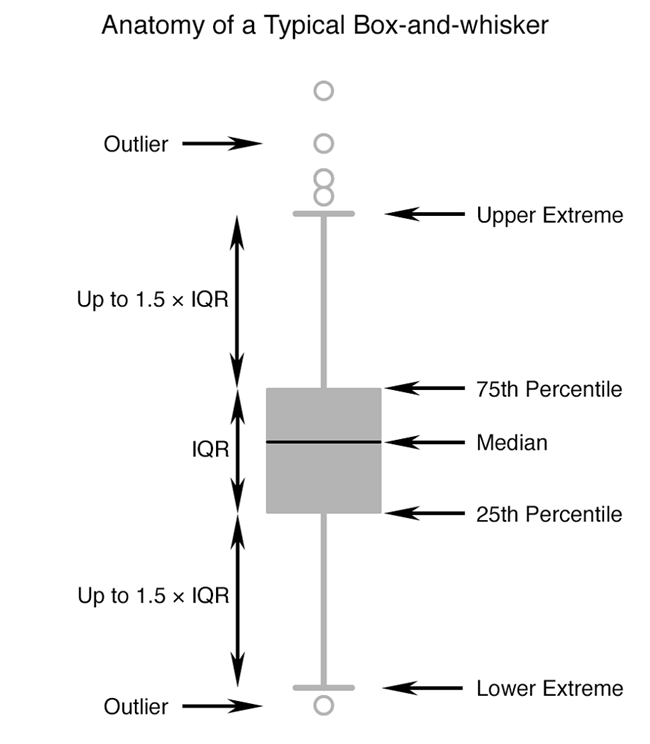

In [ ]:
# Creating subplots
fig, ax = plt.subplots(3, 2, figsize = (6, 14))
sns.set_style("darkgrid")


# Boxplot of HP
sns.boxplot(
    y = pokemon_df["hp"],
    ax = ax[0, 0],
    color = "red"
)

# Boxplot of speed
sns.____(
    y = pokemon_df[____],
    ax = ax[0, 1],
    color = "orange"
)

# Boxplot of attack
sns.boxplot(
    y = pokemon_df["attack"],
    ax = ax[1, 0],
    color = "green"
)
# Boxplot of defense
sns.boxplot(
    y = pokemon_df["defense"],
    ax = ax[1, 1],
    color = "blue"
)
# Boxplot of sattack
sns.boxplot(
    y = pokemon_df["sattack"],
    ax = ax[2, ____],
    color = "purple"
)
# Boxplot of sdefense
sns.boxplot(
    y = pokemon_df["sdefense"],
    ax = ax[2, 1],
    color = "gold"
)

plt.tight_layout()
plt.show()

In [ ]:
# Creating subplots
fig, ax = plt.subplots(3, 2, figsize = (6, 14))
sns.set_style("darkgrid")


# Violinplot of HP
sns.violinplot(
    y = pokemon_df["hp"],
    ax = ax[0, ____],
    color = "red"
)

# Violinplot of speed
sns.violinplot(
    y = pokemon_df["speed"],
    ax = ax[0, 1],
    color = "orange"
)

# Violinplot of attack
sns.____(
    y = pokemon_df["attack"],
    ax = ax[1, ____],
    color = "green"
)
# Violinplot of defense
sns.violinplot(
    y = pokemon_df["defense"],
    ax = ax[1, 1],
    color = "blue"
)
# Violinplot of sattack
sns.violinplot(
    y = pokemon_df["sattack"],
    ax = ax[2, 0],
    color = "purple"
)
# Violinplot of sdefense
sns.violinplot(
    y = pokemon_df["sdefense"],
    ax = ax[2, 1],
    color = "gold"
)

plt.tight_layout()
plt.show()

# **Feature Engineering**
**Creating new feature - `winning proportion`**

In [ ]:
merge_df.head()

In [ ]:
battles_count = pd.DataFrame(
    combats_df["pokemon1"].append(
        combats_df["pokemon2"]
    ).value_counts()
)

winning_count = pd.DataFrame(combats_df["winner"].value_counts())
battles_wins = battles_count.merge(winning_count, left_index = True, right_index = True)

battles_wins.columns = ["battles", "wins"]

# HINT : winning_prop = number of wins / number of battles
battles_wins["winning_prop"] = battles_wins[____] / battles_wins[____]
battles_wins.head()

In [ ]:
merge_df.head()

In [ ]:
merge_df = merge_df.merge(
    battles_wins["winning_prop"], 
    left_on = "id_pok1",
    right_index = True
)

merge_df = merge_df.merge(
    battles_wins["winning_prop"], 
    left_on = "id_pok2",
    right_index = ____,
    suffixes = ("", "_pok2")
)

cols = list(merge_df.columns)
cols[-2] = "winning_prop_pok1"
merge_df.columns = cols

In [ ]:
merge_df.drop(["id_pok1", "id_pok2", "name_pok1", "name_pok2"], inplace = True, axis = 1)

In [ ]:
merge_df.head()

# **Data Preparation**
**`Machines can learn only from numbers`**

# OneHot Encoding for Nominal categorical data

In [ ]:
merge_df.info()

In [ ]:
cat_cols = [
    "type1_pok1", "type2_pok1",
    "generation_pok1",
    "type1_pok2", "type2_pok2",
    "generation_pok2",
]

merge_df[cat_cols] = merge_df[cat_cols].astype("category")

In [ ]:
merge_df.info()

In [ ]:
# Create dummy variables
merge_df = pd.____(
    merge_df,
    drop_first = True
)

In [ ]:
merge_df.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = [
    "hp_pok1", "hp_pok2",
    "attack_pok1", "attack_pok2",
    "defense_pok1", "defense_pok2",
    "sattack_pok1", "sattack_pok2",
    "sdefense_pok1", "sdefense_pok2",
    "speed_pok1", "speed_pok2"
]

cls_normalizer = MinMaxScaler()
merge_df[numeric_cols] = cls_normalizer.fit_transform(merge_df[numeric_cols])

In [ ]:
reg_normalizer = MinMaxScaler()

# Fit the normalizer and Transform the data
pokemon_df[["attack", "defense", "sattack", "sdefense", "speed"]] = reg_normalizer.____(
    pokemon_df[["attack", "defense", "sattack", "sdefense", "speed"]]
)

target_normalizer = MinMaxScaler()
pokemon_df[["hp"]] = target_normalizer.fit_transform(pokemon_df[["hp"]])

In [ ]:
merge_df.head()

In [ ]:
pokemon_df[["attack", "defense", "sattack", "sdefense", "speed", "hp"]].head()

In [ ]:
merge_df[["legendary_pok1", "legendary_pok2", "winner"]] = merge_df[
    ["legendary_pok1", "legendary_pok2", "winner"]
].astype("uint8")

In [ ]:
display(merge_df.head())
print(merge_df.info())

In [ ]:
type1_pok1_cols = list(merge_df.columns[17:34])
type2_pok1_cols = list(merge_df.columns[34:51])
type1_pok2_cols = list(merge_df.columns[56:73])
type2_pok2_cols = list(merge_df.columns[73:90])

In [ ]:
merge_df[type1_pok1_cols] = merge_df[type1_pok1_cols].values + merge_df[type2_pok1_cols].values
merge_df[type1_pok2_cols] = merge_df[type1_pok2_cols].values + merge_df[type2_pok2_cols].values

merge_df.drop(type2_pok1_cols + type2_pok2_cols, inplace =  True, axis = 1)

In [ ]:
merge_df.head()

# Reorder columns for our convenience

In [ ]:
pok1_cols = [x for x in merge_df.columns if 'pok1' in x]
pok2_cols = [x for x in merge_df.columns if 'pok2' in x]
target = ["winner"]

merge_df.columns = pok1_cols + pok2_cols + target

In [ ]:
display(merge_df.head())
print(merge_df.info())

# **Exporting Files**

In [ ]:
with open("cls_normalizer.pickle", 'wb') as f:
    pickle.dump(cls_normalizer, f)
    
with open("reg_normalizer.pickle", 'wb') as f:
    pickle.____(reg_normalizer, f)

with open("reg_target_normalizer.pickle", 'wb') as f:
    pickle.____(____, f)

    

merge_df.to_csv("classification data.csv", index = False)

pokemon_df[
    ["attack", "defense", "sattack", "sdefense", "speed", "hp"]
].____("regression data.csv", index = ____)